In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sn
import scipy

In [50]:
df = pd.read_csv("../Data/EPL_Soccer_MLR_LR.csv")

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DistanceCovered(InKms),202.0,4.718614,0.457976,3.80,4.3725,4.755,5.030,6.72
Goals,202.0,7.108663,1.800549,3.30,5.9000,6.850,8.275,14.30
MinutestoGoalRatio,202.0,43.091584,3.662989,35.90,40.6000,43.500,45.575,59.70
ShotsPerGame,202.0,14.566337,1.362451,11.60,13.5000,14.700,15.575,19.20
AgentCharges,202.0,76.876238,47.501239,8.00,41.2500,65.500,97.000,234.00
BMI,202.0,22.955891,2.863933,16.75,21.0825,22.720,24.465,34.42
Cost,202.0,69.021782,32.565333,28.00,43.8500,58.600,90.350,200.80
PreviousClubCost,202.0,64.873713,13.070197,34.36,54.6675,63.035,74.750,106.00
Height,202.0,180.103960,9.734494,148.90,174.0000,179.700,186.175,209.40
Weight,202.0,75.008168,13.925574,37.80,66.5250,74.400,84.125,123.20


In [53]:
df.shape

(202, 13)

In [54]:
df.corr()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


### Cost seems most correlated to the score lets use this to predict the score


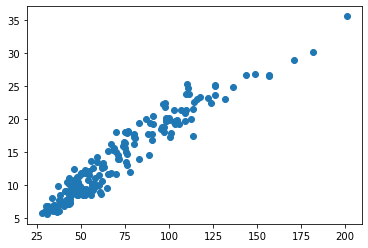

In [65]:
plt.scatter(df['Cost'],df['Score'])
plt.show()

In [67]:
X = df['Cost']
y = df['Score']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,test_size=0.25,random_state=42)

In [68]:
lr = sn.OLS(y_train,X_train).fit()

In [69]:
lr.params

Cost    0.192712
dtype: float64

In [70]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Score   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.136e+04
Date:                Mon, 07 Aug 2023   Prob (F-statistic):                   2.80e-143
Time:                        01:14:40   Log-Likelihood:                         -294.44
No. Observations:                 151   AIC:                                      590.9
Df Residuals:                     150   BIC:                                      593.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cost           0.1927      0.002    106.576      0.000       0.189       0.196
==============================================================================
Omnibus:                        1.721   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.423   Jarque-Bera (JB):                1.391
Skew:                          -0.014   Prob(JB):                        0.499
Kurtosis:                       3.469   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
X_train_with_intercept = sn.add_constant(X_train)
lr_1 = sn.OLS(y_train,X_train_with_intercept).fit()

lr_1.summary()

/Users/abhilashkollikonda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1936.
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           2.89e-87
Time:                        01:14:47   Log-Likelihood:                -291.39
No. Observations:                 151   AIC:                             586.8
Df Residuals:                     149   BIC:                             592.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7921      0.320      2.475      0.014       0.160       1.424
Cost           0.1834      0.004     43.999      0.000       0.175       0.192
==============================================================================
Omnibus:                        3.472   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                3.165
Skew:                           0.352   Prob(JB):                        0.205
Kurtosis:                       3.083   Cond. No.                         180.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
b0 = lr_1.params[0]
b1 = lr_1.params[1]
print(lr_1.params)

const    0.792082
Cost     0.183383
dtype: float64


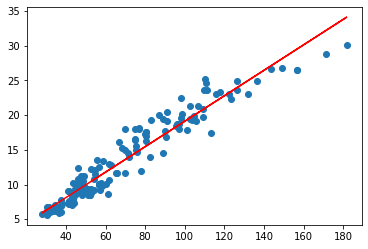

In [77]:
plt.scatter(X_train,y_train)

plt.plot(X_train,b0+b1*X_train,'r')

plt.show()

In [78]:
X_test_with_intercept = sn.add_constant(X_test)
y_test_fitted = lr_1.predict(X_test_with_intercept)

/Users/abhilashkollikonda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


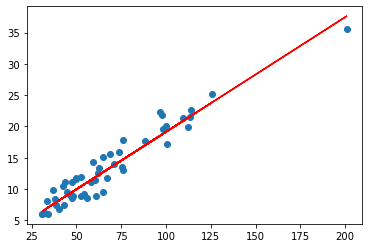

In [79]:
plt.scatter(X_test,y_test)

plt.plot(X_test,y_test_fitted,'r')

plt.show()

#### Residual Analysis

	
	1) Non linearity
	2) Hetero skedacitiy - Non constant variance
	3) Deviation from Normality
	3) Errors are not IID
	4) Outliers 
    5) Missing predictor variable

In [81]:
pred_y = lr_1.predict(X_train_with_intercept)

In [83]:
# Find residuals

r_i = (y_train - pred_y)

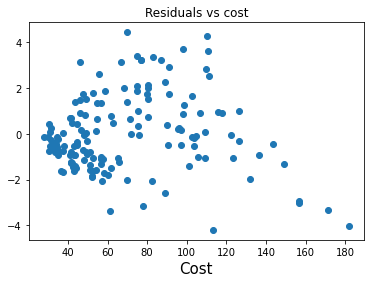

In [84]:
plt.title("Residuals vs cost")

plt.xlabel("Cost",fontsize = 15)

plt.scatter(X_train,r_i)

plt.show()

((array([-2.60603471, -2.28639722, -2.10324767, -1.97158309, -1.867224  ,
         -1.7799545 , -1.70445293, -1.63757876, -1.57731662, -1.52229259,
         -1.47152616, -1.42429196, -1.3800376 , -1.33833223, -1.29883298,
         -1.26126233, -1.22539231, -1.19103324, -1.1580255 , -1.12623343,
         -1.09554071, -1.06584677, -1.03706405, -1.0091158 , -0.98193434,
         -0.95545967, -0.92963831, -0.90442237, -0.87976879, -0.85563868,
         -0.83199678, -0.80881102, -0.78605212, -0.76369328, -0.74170987,
         -0.7200792 , -0.69878032, -0.67779383, -0.65710172, -0.6366872 ,
         -0.61653466, -0.59662946, -0.57695791, -0.55750713, -0.53826504,
         -0.51922023, -0.50036191, -0.48167989, -0.4631645 , -0.44480656,
         -0.42659733, -0.40852846, -0.39059201, -0.37278035, -0.35508619,
         -0.33750252, -0.32002258, -0.3026399 , -0.28534819, -0.26814138,
         -0.25101361, -0.23395916, -0.2169725 , -0.20004822, -0.18318105,
         -0.16636584, -0.14959754, -0.

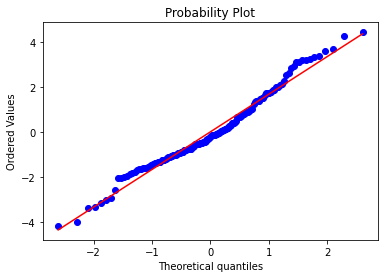

In [87]:
scipy.stats.probplot(r_i,plot = plt)

/Users/abhilashkollikonda/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


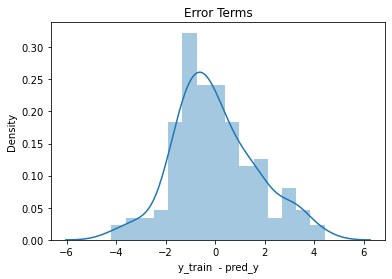

In [93]:
import seaborn as sns

sns.distplot(r_i,bins = 15)

plt.title("Error Terms")

plt.xlabel("y_train  - pred_y")


plt.show()

Text(0.5, 1.0, 'Residual box plot')

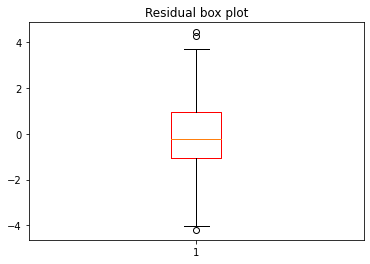

In [96]:
plt.boxplot(r_i,boxprops=dict(color=  'red'))
plt.title("Residual box plot")